In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("heart_v2.csv")

In [3]:
df.head()

,age,sex,BP,cholestrol,heart disease
0,70,1,130,322,1
1,67,0,115,564,0
2,57,1,124,261,1
3,64,1,128,263,0
4,74,0,120,269,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   age            270 non-null    int64
 1   sex            270 non-null    int64
 2   BP             270 non-null    int64
 3   cholestrol     270 non-null    int64
 4   heart disease  270 non-null    int64
dtypes: int64(5)
memory usage: 10.7 KB


In [5]:
df['heart disease'].value_counts()

0    150
1    120
Name: heart disease, dtype: int64

In [6]:
X = df.drop('heart disease', axis=1)
y = df['heart disease'].copy()

In [7]:
X.head()

,age,sex,BP,cholestrol
0,70,1,130,322
1,67,0,115,564
2,57,1,124,261
3,64,1,128,263
4,74,0,120,269


In [8]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: heart disease, dtype: int64

In [9]:
##train test split

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7,random_state=42)

In [12]:
X_train.shape,X_test.shape

((189, 4), (81, 4))

In [13]:
##Buld the decision tree
##use all default parameter expect depth

In [14]:
from sklearn.tree import DecisionTreeClassifier

In [15]:
dt = DecisionTreeClassifier(max_depth=3)

In [16]:
dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [17]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [18]:
# Importing required packages for visualization
from IPython.display import Image  
from six import StringIO
from sklearn.tree import export_graphviz
import pydotplus, graphviz

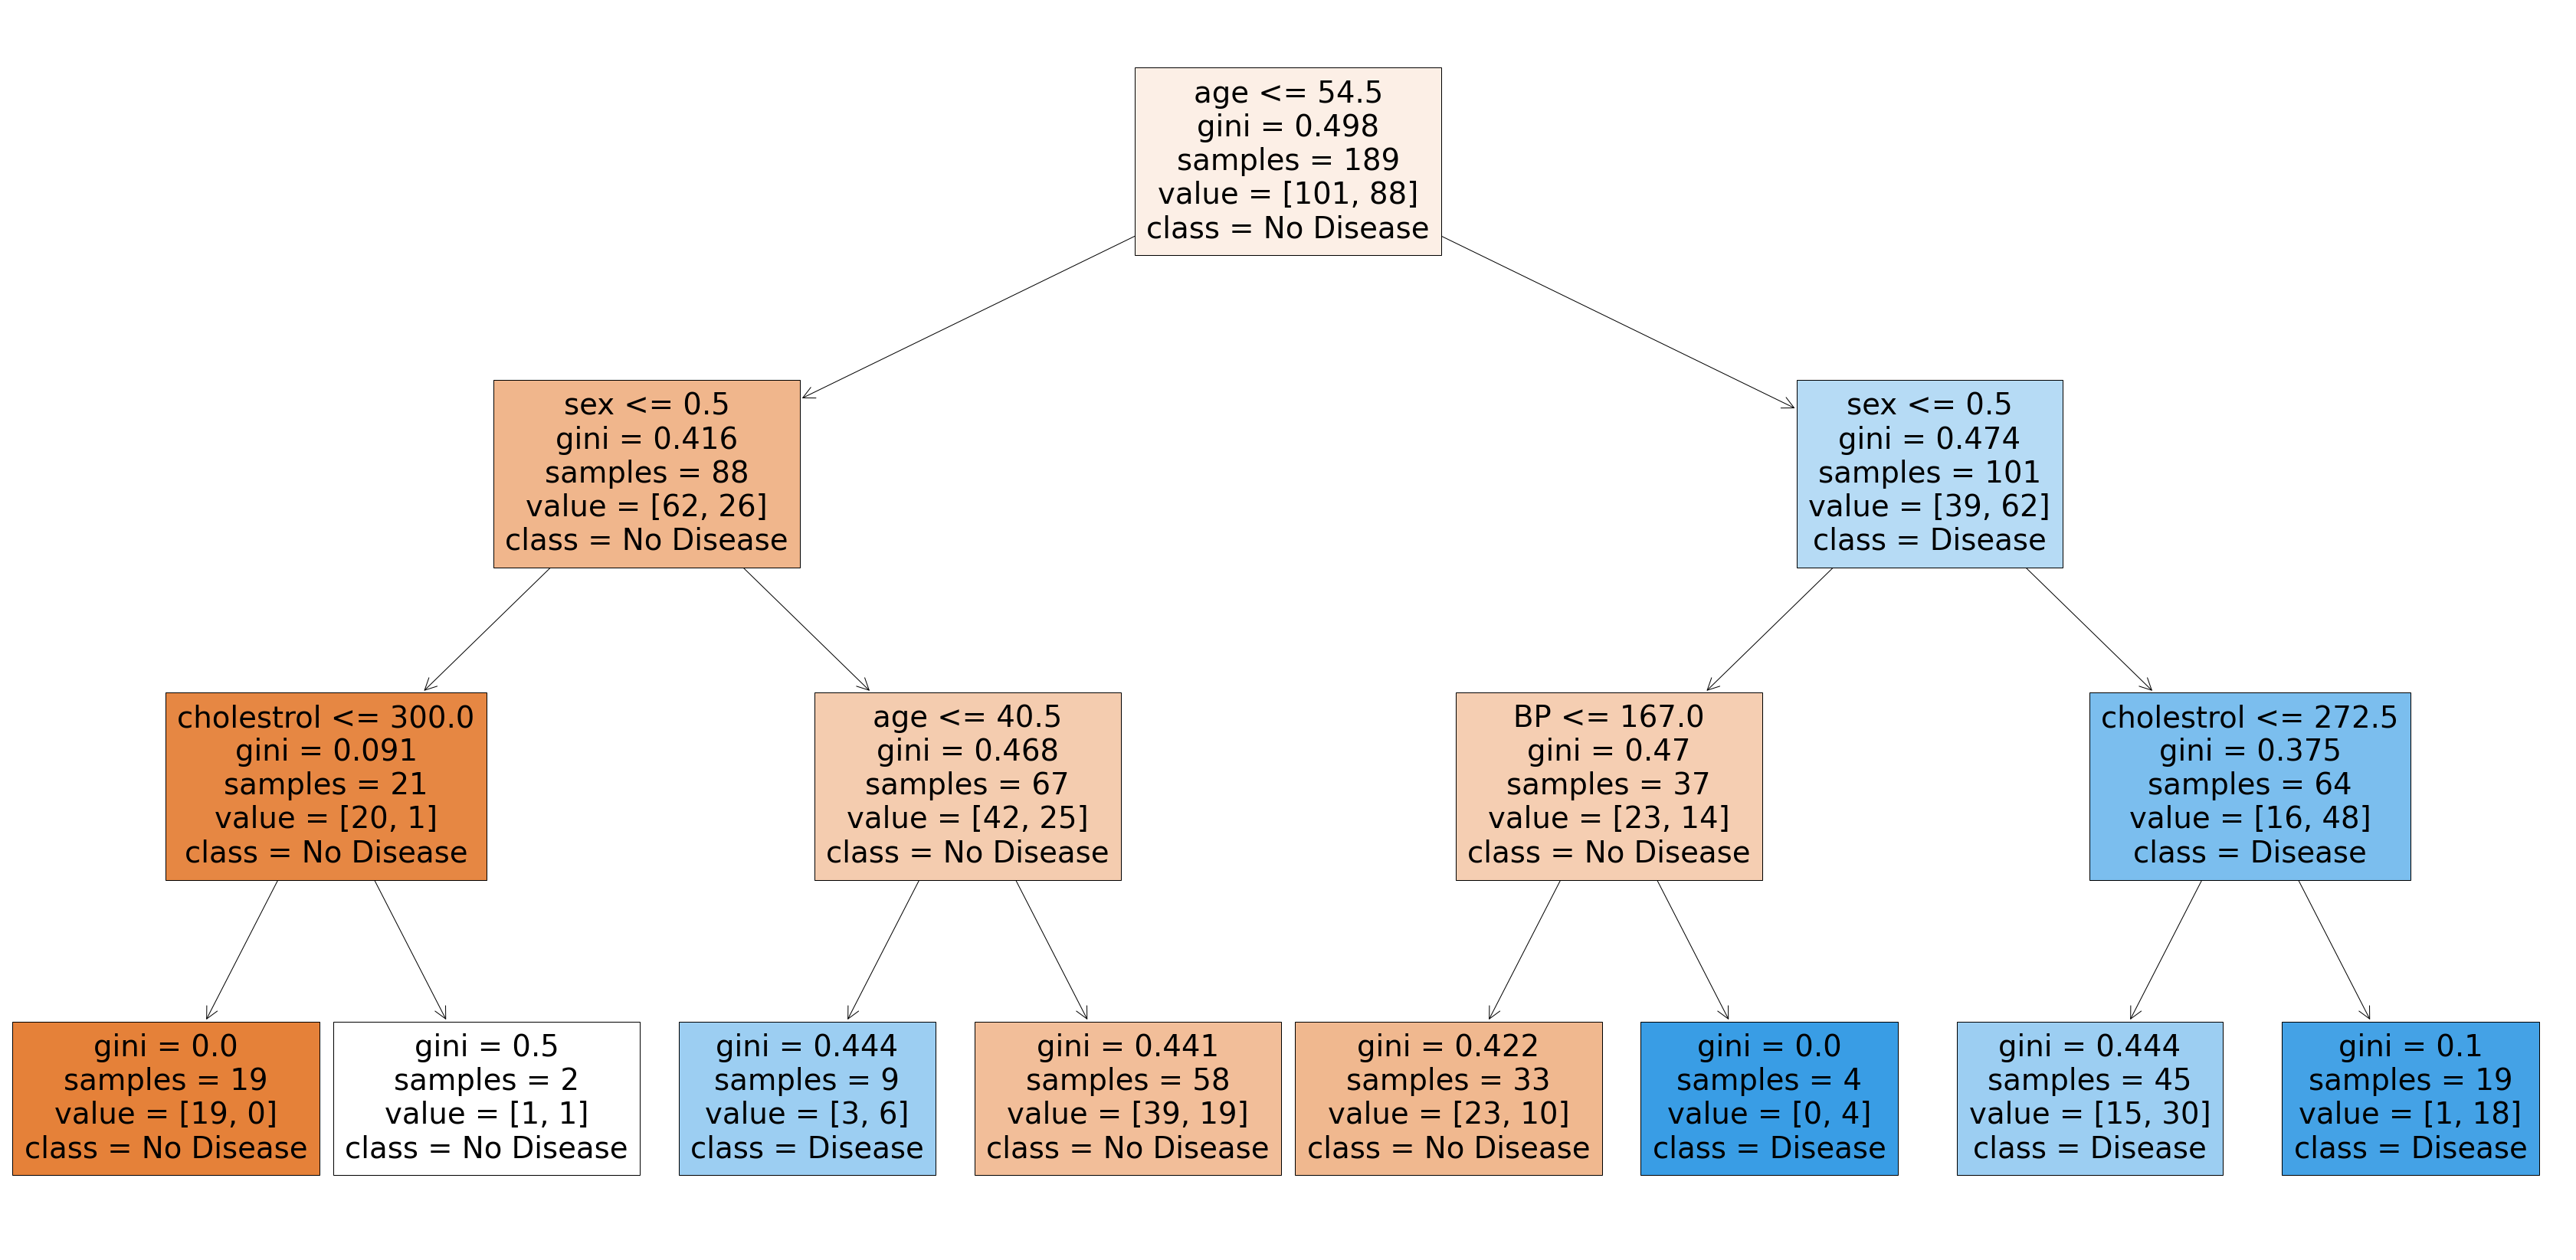

In [19]:
from sklearn.tree import plot_tree
plt.figure(figsize=(60,30))
plot_tree(dt, feature_names = X.columns,class_names=['No Disease', "Disease"],filled=True);

In [20]:
y_train_pred=dt.predict(X_train)
y_test_pred=dt.predict(X_test)

In [21]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [22]:
print(accuracy_score(y_train,y_train_pred))
confusion_matrix(y_train,y_train_pred)

0.7407407407407407


array([[82, 19],
       [30, 58]])

In [23]:
print("Test set Performence")
print(accuracy_score(y_test,y_test_pred))
confusion_matrix(y_test,y_test_pred)

Test set Performence
0.6049382716049383


array([[35, 14],
       [18, 14]])

In [24]:
##Decision tree without any hyper parameter setting

In [25]:
dt_default = DecisionTreeClassifier(random_state=42)
dt_default.fit(X_train,y_train)

DecisionTreeClassifier(random_state=42)

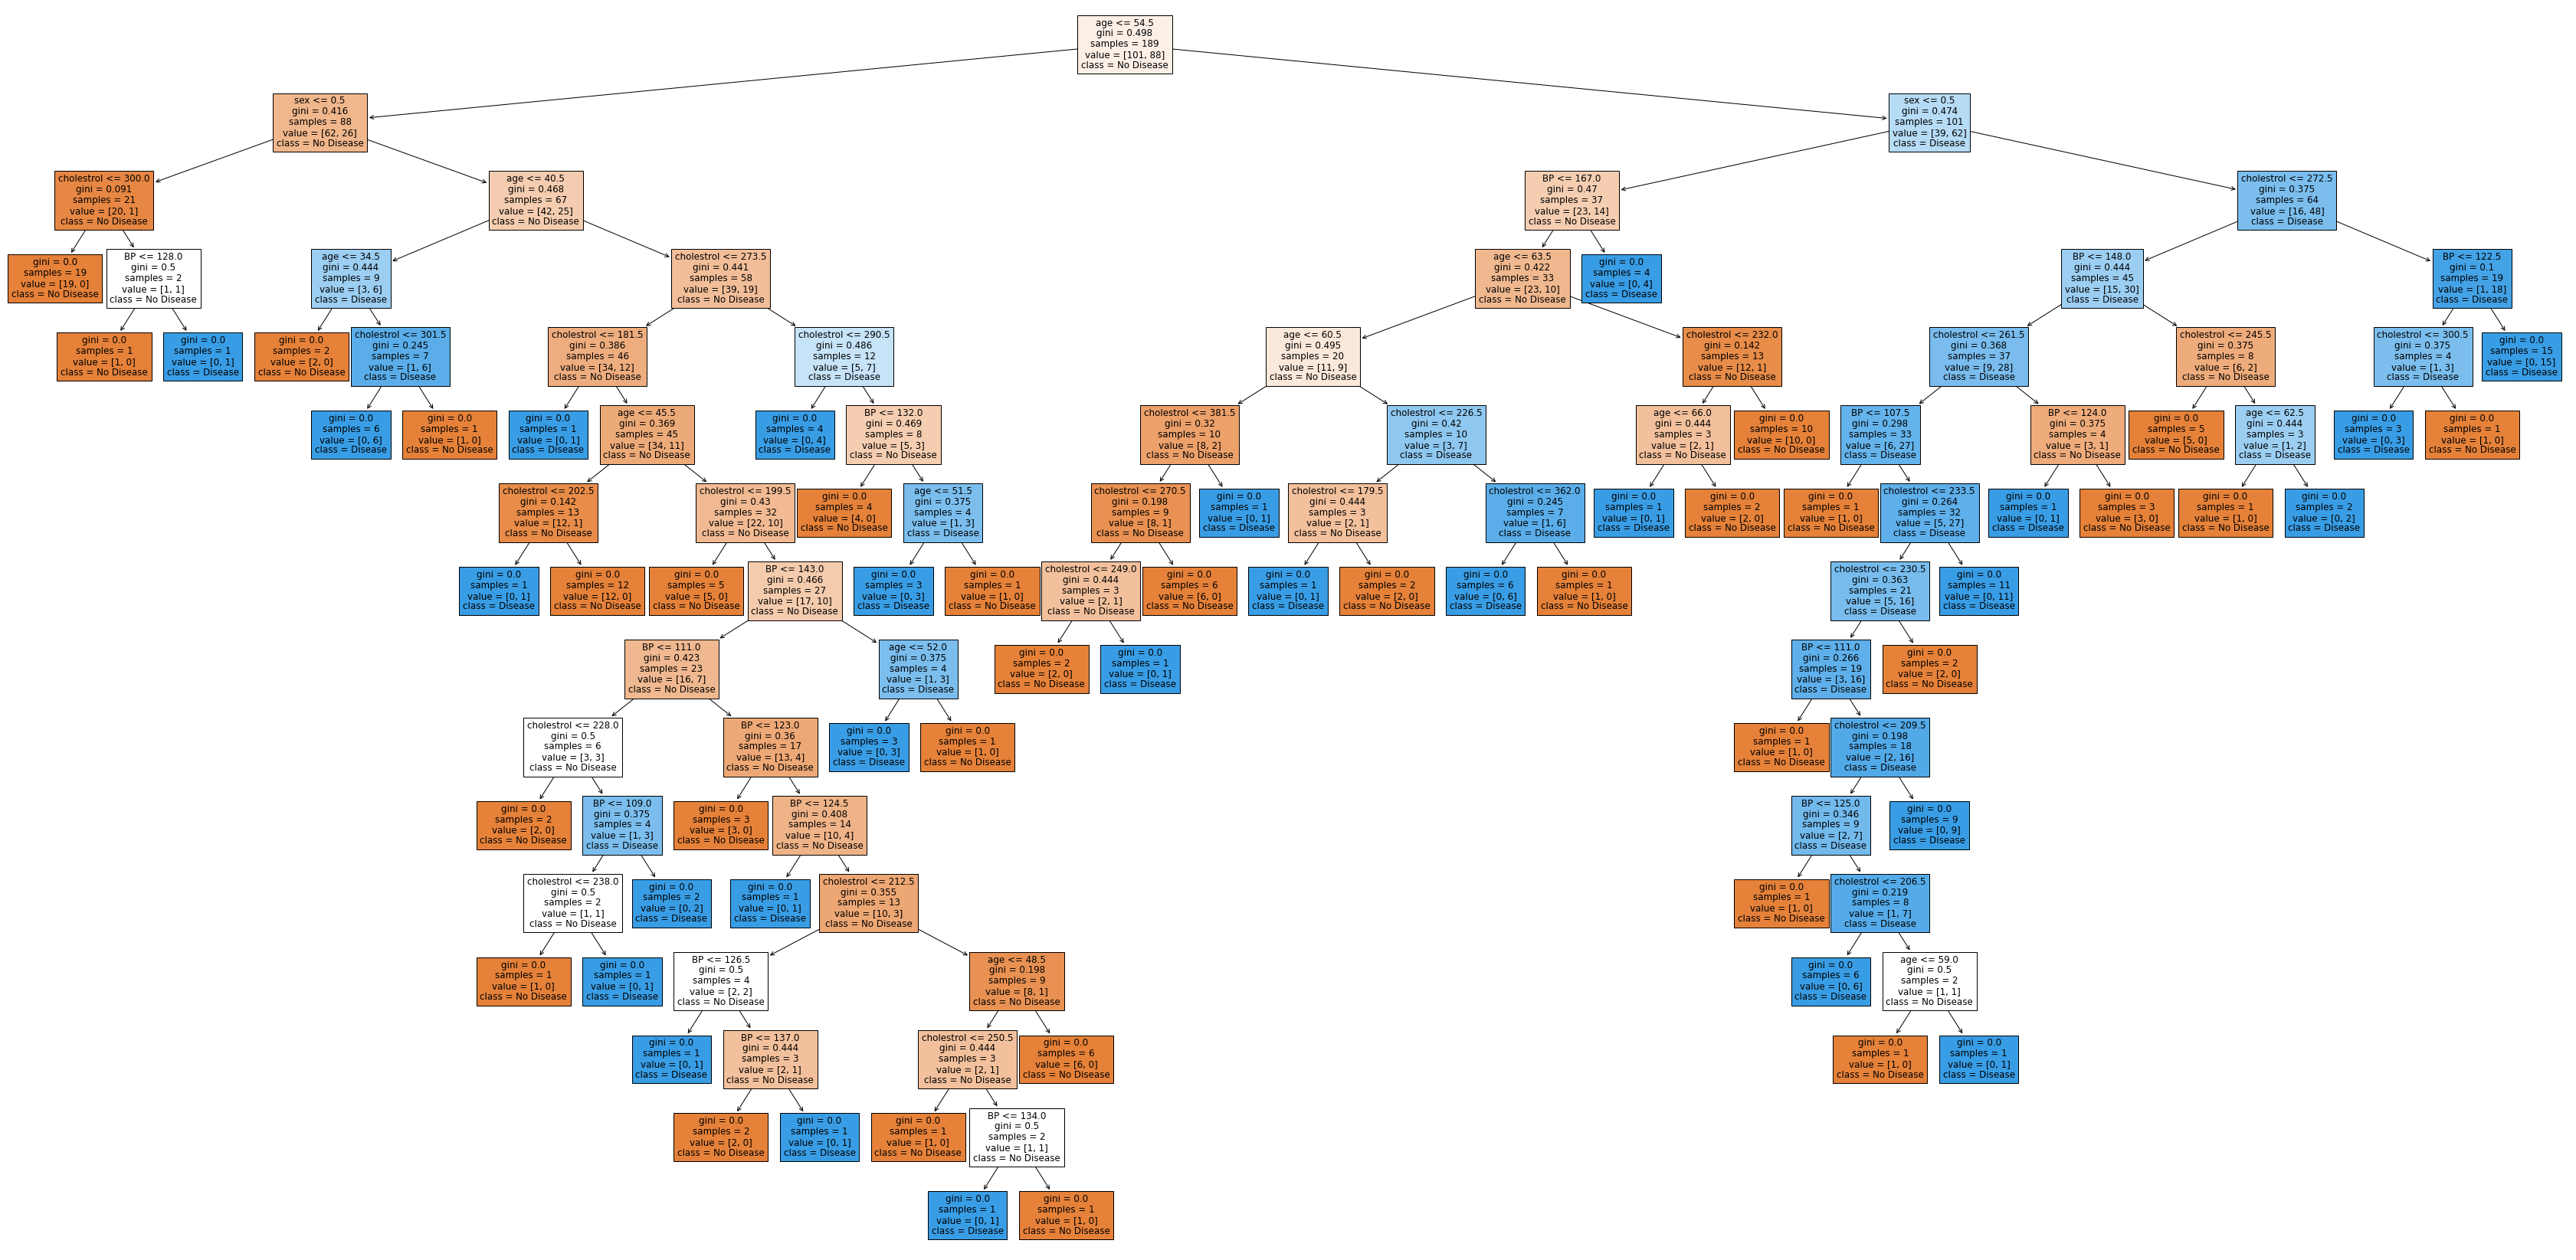

In [26]:
plt.figure(figsize=(60,30))
plot_tree(dt_default, feature_names = X.columns,class_names=['No Disease', "Disease"],filled=True);

# using Random forest classifier

In [28]:
from sklearn.ensemble import RandomForestClassifier

In [29]:
X_train.head()

,age,sex,BP,cholestrol
84,57,1,110,201
251,44,1,130,219
92,54,1,124,266
201,58,1,125,300
126,62,1,120,267


In [30]:
y_train.head()

84     0
251    0
92     1
201    1
126    1
Name: heart disease, dtype: int64

In [31]:
rf=RandomForestClassifier(random_state=42,max_depth=3,n_estimators=10)

In [32]:
rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=3, n_estimators=10, random_state=42)

In [34]:
rf.estimators_[0]

DecisionTreeClassifier(max_depth=3, max_features='auto',
                       random_state=1608637542)

In [35]:
sample_tree=rf.estimators_[4]

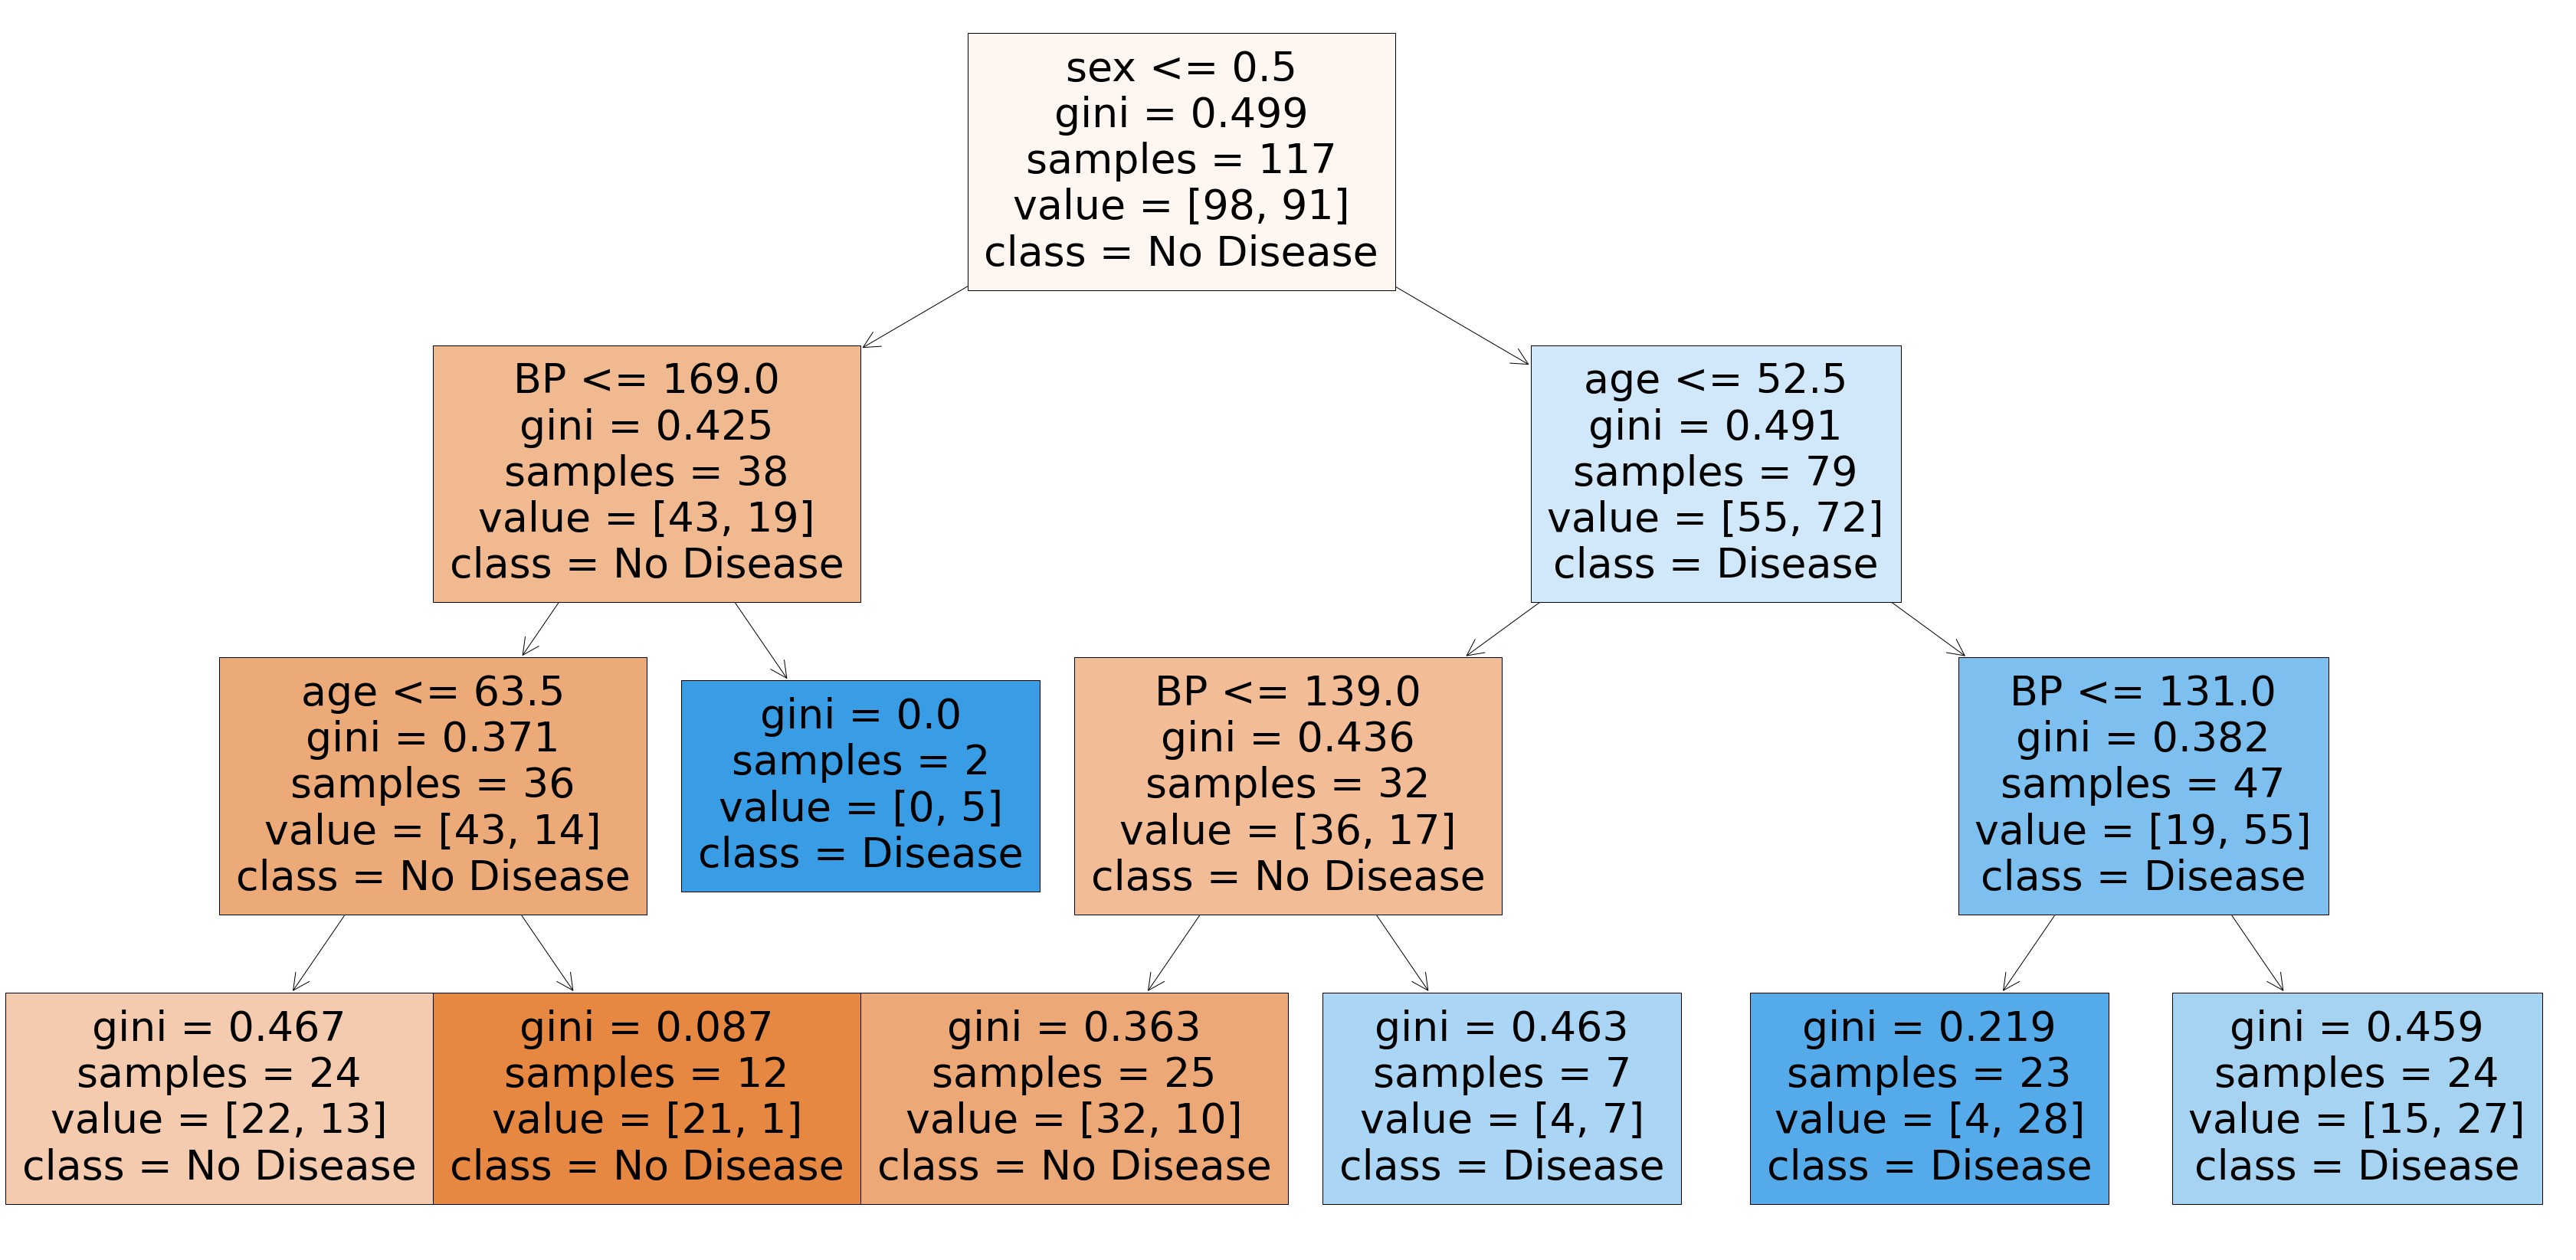

In [39]:
plt.figure(figsize=(60,30))
plot_tree(sample_tree, feature_names = X.columns,class_names=['No Disease', "Disease"],filled=True);

In [40]:
sample_tree=rf.estimators_[2]

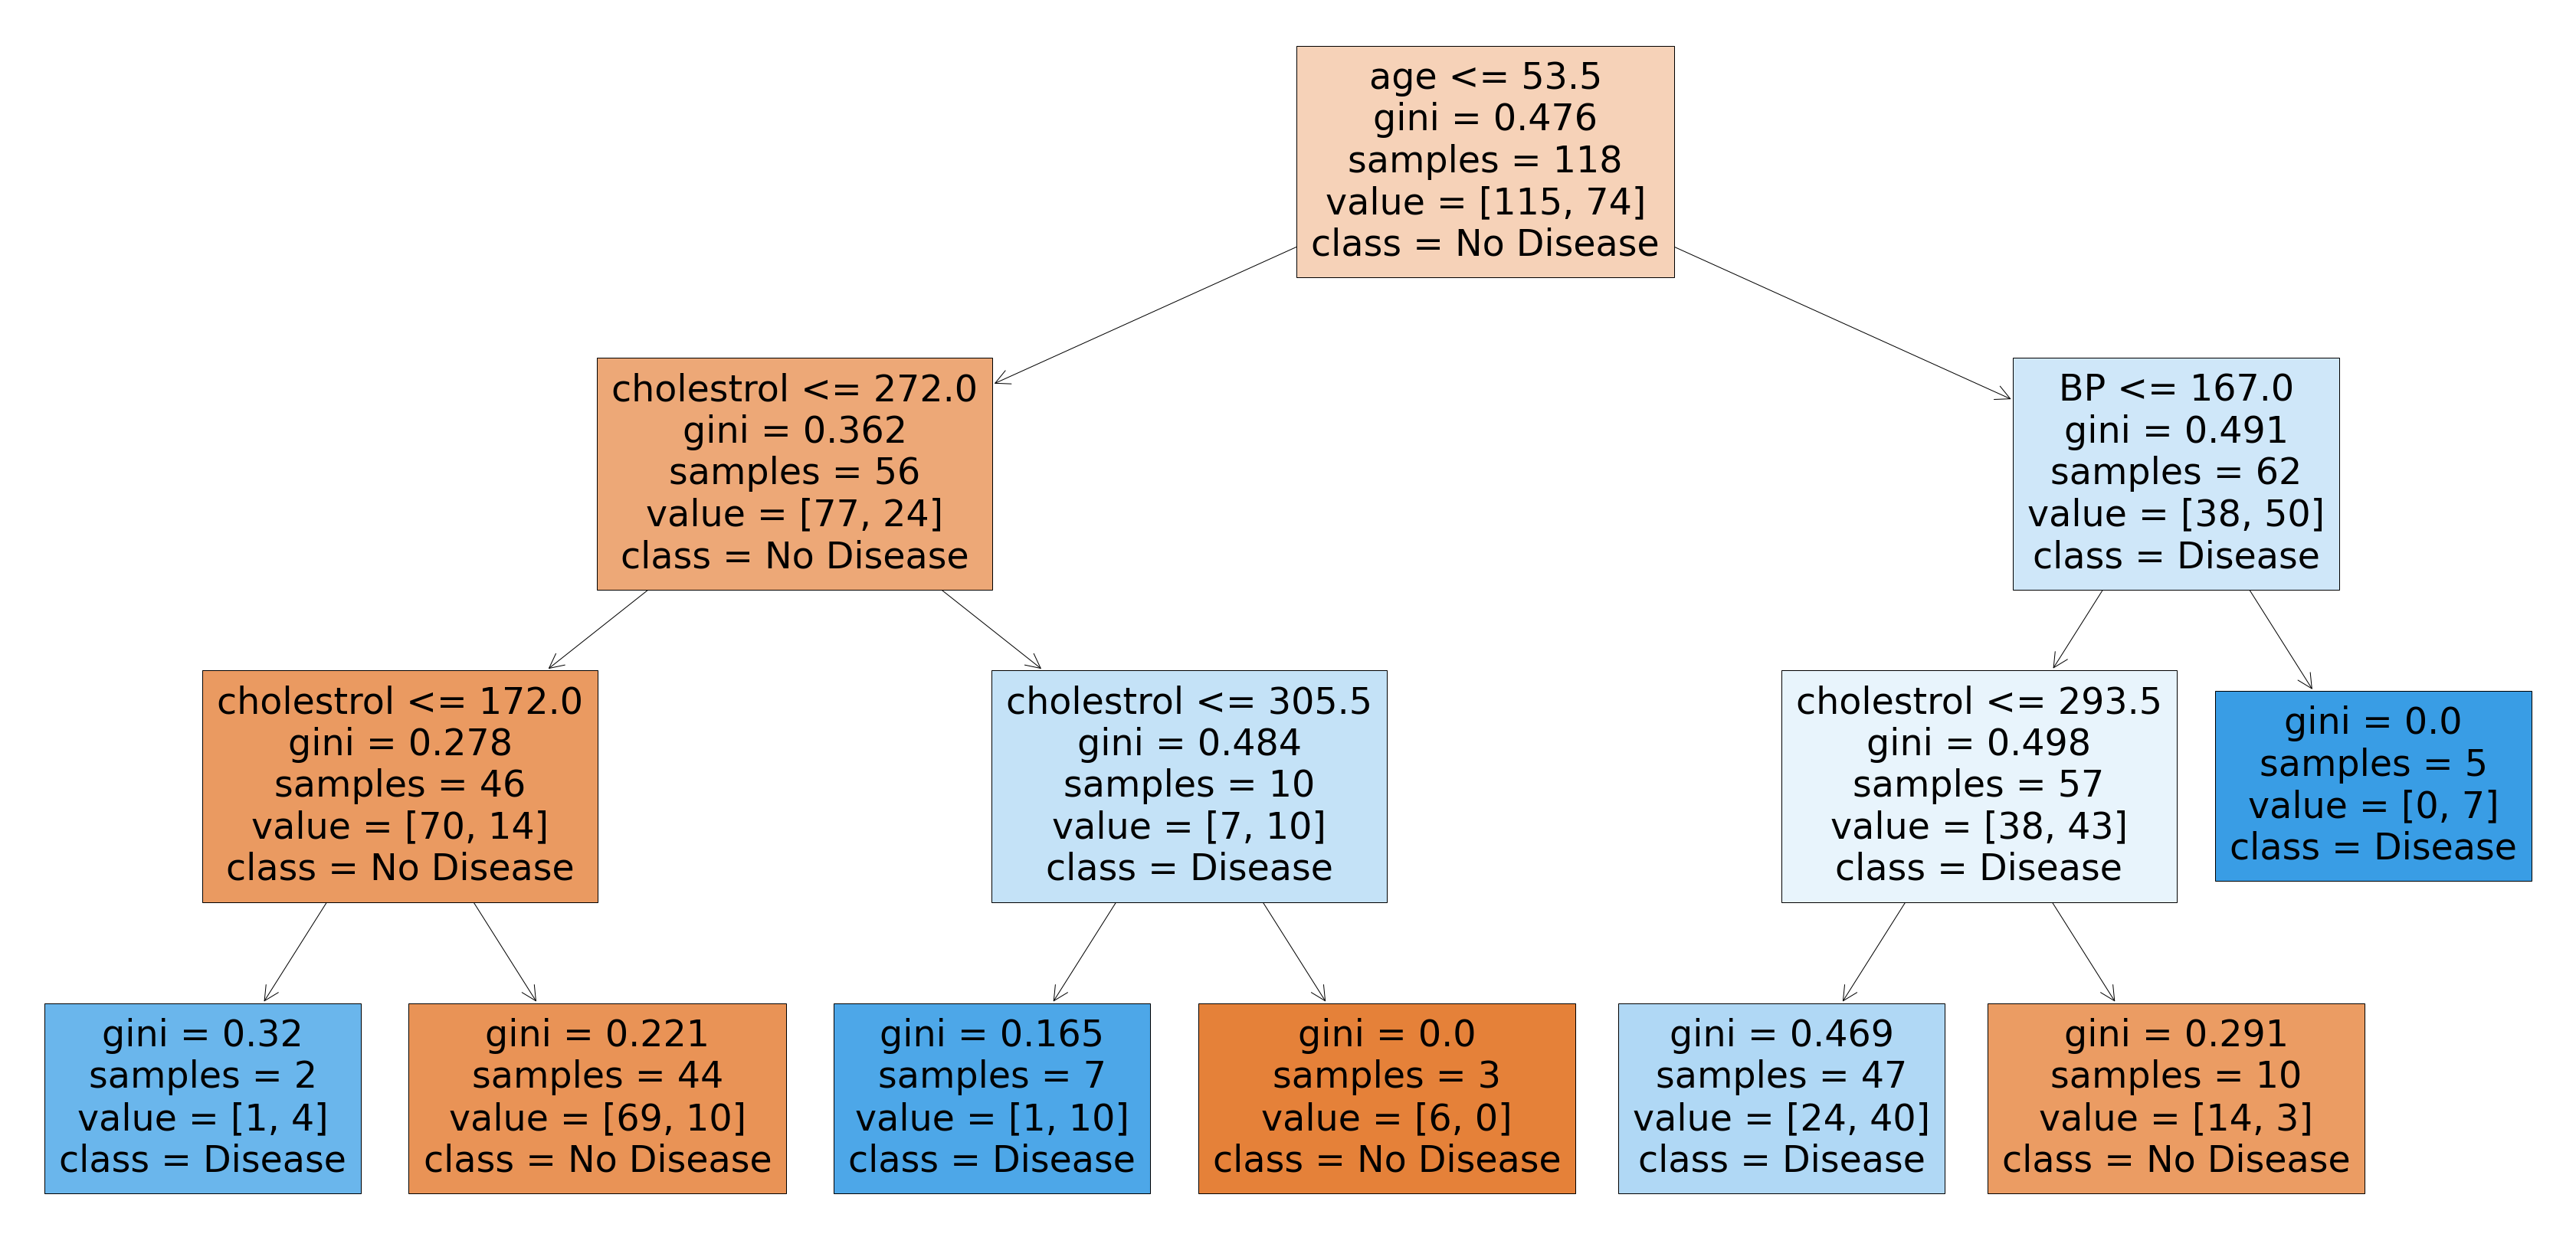

In [41]:
plt.figure(figsize=(60,30))
plot_tree(sample_tree, feature_names = X.columns,class_names=['No Disease', "Disease"],filled=True);

# OOB Score(Out Of Beg Error)

In [42]:
rf=RandomForestClassifier(random_state=42,max_depth=3,n_estimators=10,oob_score=True)

In [43]:
rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=3, n_estimators=10, oob_score=True,
                       random_state=42)

In [44]:
rf.oob_score_

0.6349206349206349

# Grid Search for Hyper- parameter Tunning

In [69]:
from sklearn.model_selection import GridSearchCV

In [70]:
classifier_rf=RandomForestClassifier(random_state=42,n_jobs=-1)

In [71]:
#create the hyperparameter grid based on result of random search
params={
    'max_depth':[1,2,5,10,20],
    'min_samples_leaf':[5,10,20,50,100],
    'max_features':[2,3,4],
    'n_estimators':[10,20,30,50,100,200]
}

In [72]:
grid_search = GridSearchCV(estimator=classifier_rf,param_grid=params,
                       cv=4,n_jobs=-1,verbose=1,scoring="accuracy")

In [73]:
print(classifier_rf.get_params().keys())


dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])


In [74]:
grid_search.fit(X,y)

Fitting 4 folds for each of 450 candidates, totalling 1800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 512 tasks      | elapsed:   10.3s
[Parallel(n_jobs=-1)]: Done 1512 tasks      | elapsed:   27.5s
[Parallel(n_jobs=-1)]: Done 1800 out of 1800 | elapsed:   32.7s finished


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [1, 2, 5, 10, 20],
                         'max_features': [2, 3, 4],
                         'min_samples_leaf': [5, 10, 20, 50, 100],
                         'n_estimators': [10, 20, 30, 50, 100, 200]},
             scoring='accuracy', verbose=1)

In [75]:
rf_best=grid_search.best_estimator_

In [76]:
rf_best

RandomForestClassifier(max_depth=5, max_features=3, min_samples_leaf=5,
                       n_estimators=20, n_jobs=-1, random_state=42)

In [79]:
best_score = grid_search.best_score_

In [80]:
best_score

0.7296971027216858

In [81]:
smaple_tree=rf_best.estimators_[0]

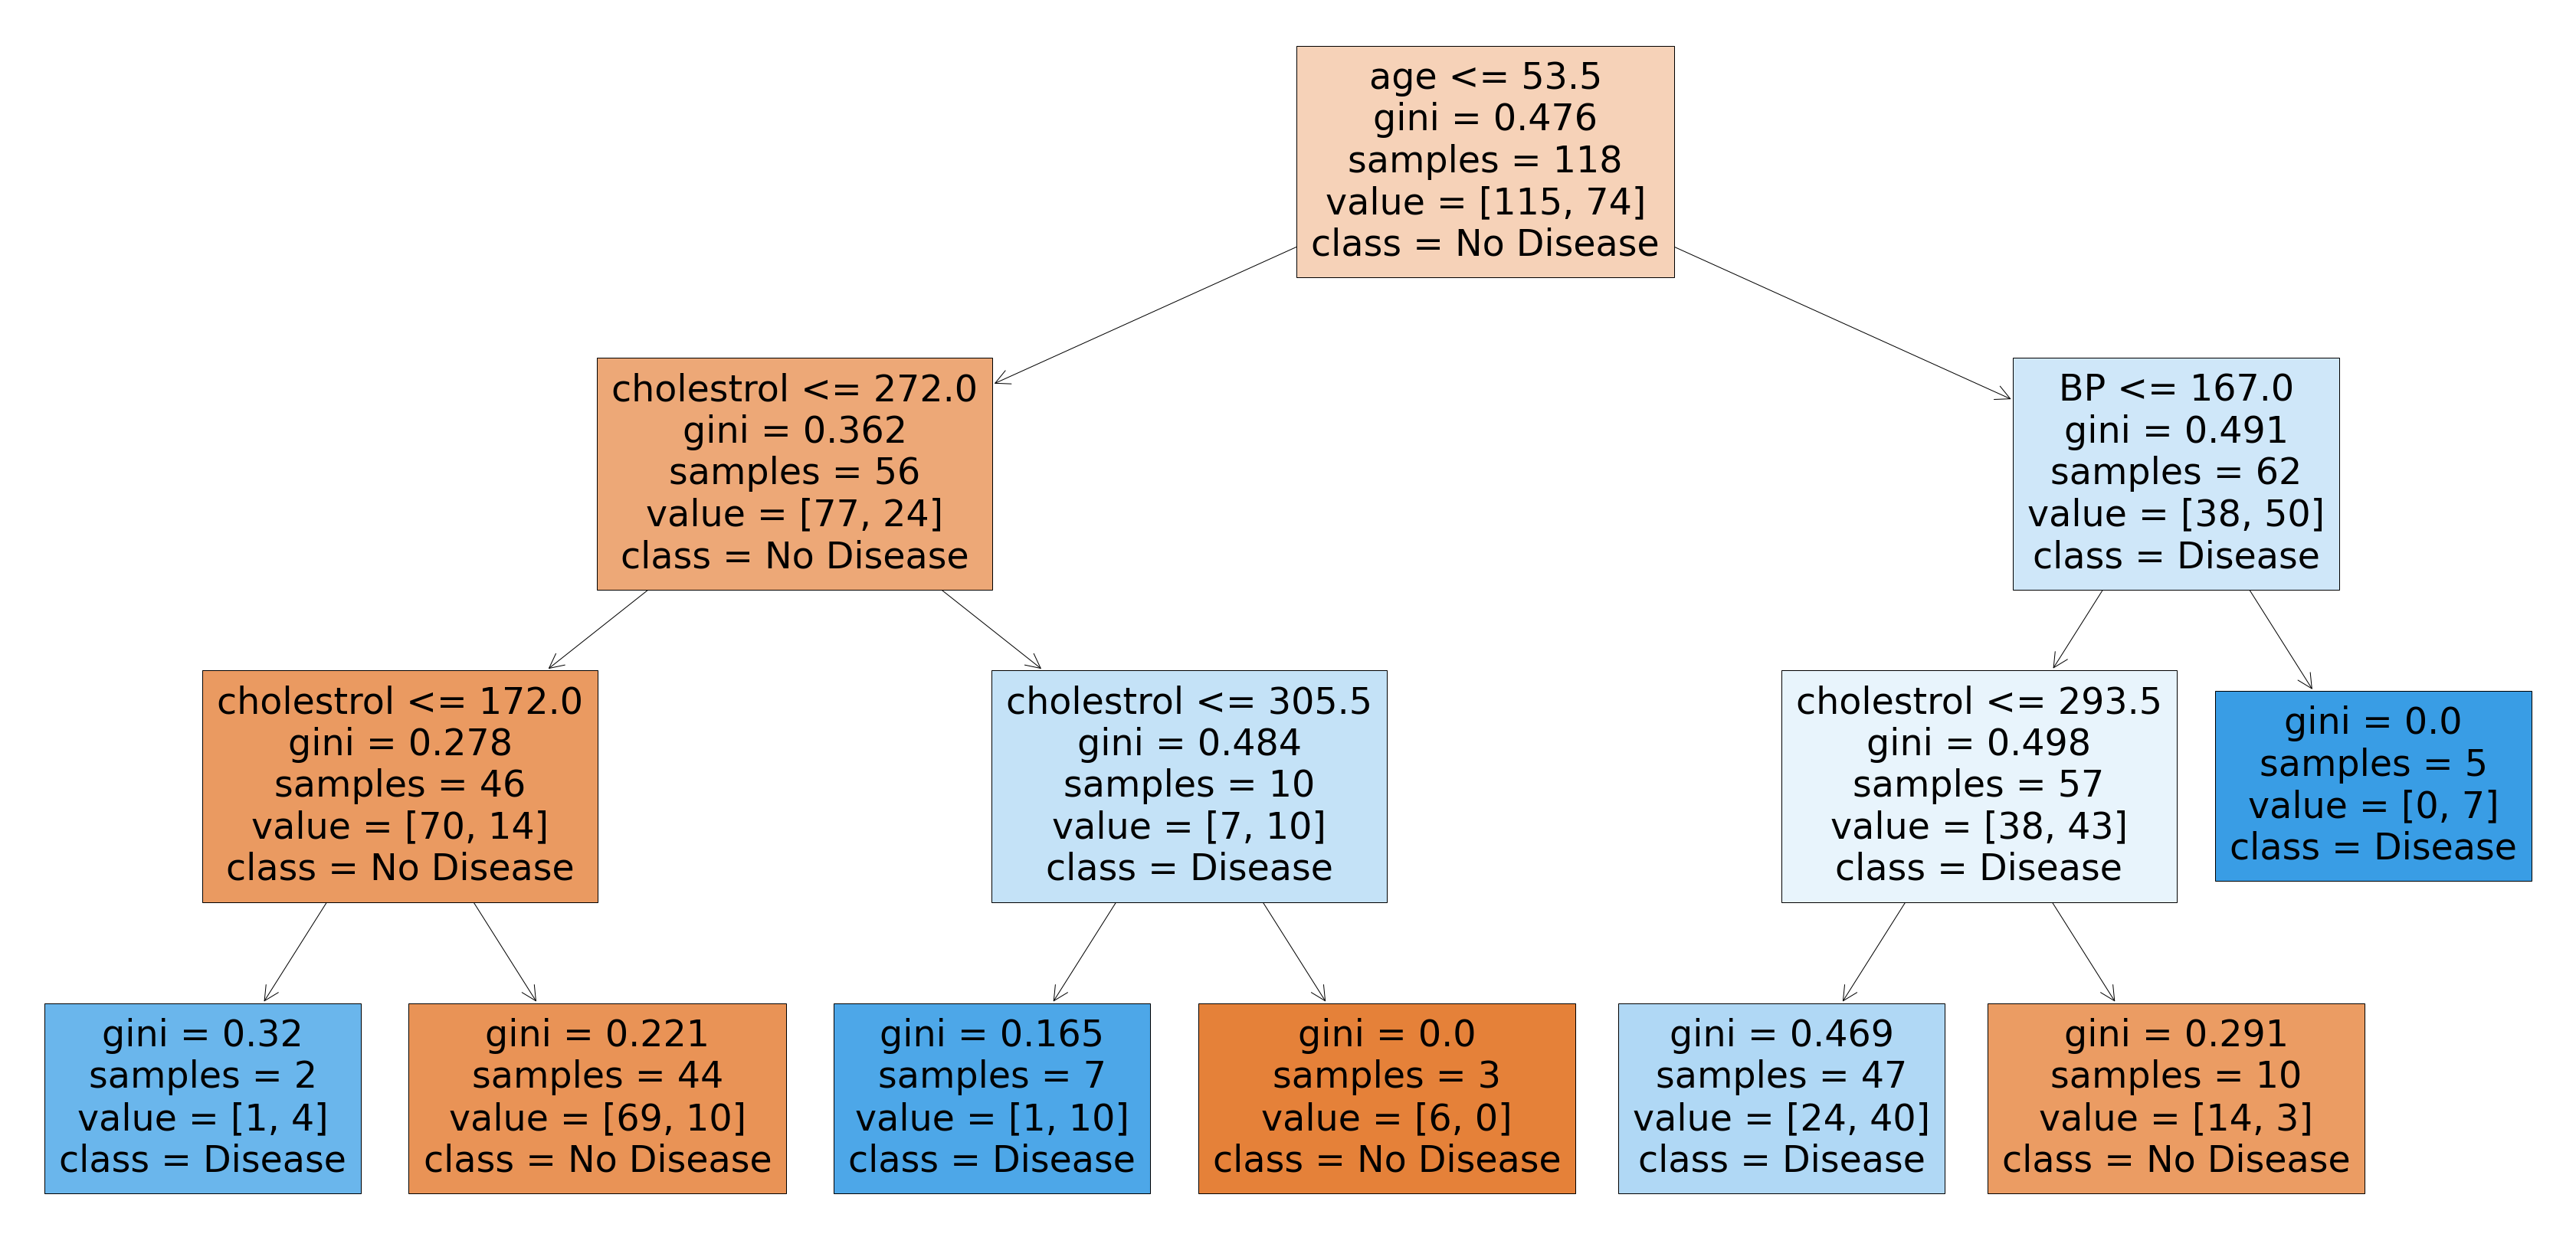

In [82]:
plt.figure(figsize=(60,30))
plot_tree(sample_tree, feature_names = X.columns,class_names=['No Disease', "Disease"],filled=True);

# Variable importance in random forest and decision tree

In [89]:
rf=RandomForestClassifier(random_state=42,max_depth=5,n_estimators=100,oob_score=True)

In [90]:
classifier_rf.fit(X_train,y_train)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [91]:
classifier_rf.feature_importances_

array([0.33884794, 0.0900696 , 0.24112091, 0.32996154])

In [95]:
imp_df=pd.DataFrame({
    "Varname":X_train.columns,
    "Imp":classifier_rf.feature_importances_
})

In [97]:
imp_df.sort_values(by="Imp",ascending=False)

,Varname,Imp
0,age,0.338848
3,cholestrol,0.329962
2,BP,0.241121
1,sex,0.090070
